# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [215]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [216]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study.groupby('Mouse ID')['Timepoint'].unique()
print(duplicate_mice)

Mouse ID
a203    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a251    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a262    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a275    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a366                [0, 5, 10, 15, 20, 25, 30]
                         ...                  
z435                                [0, 5, 10]
z578    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z581    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z795    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z969    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Name: Timepoint, Length: 249, dtype: object


In [217]:
# Optional: Get all the data for the duplicate mouse ID. 
z581 = mouse_study.loc[mouse_study["Mouse ID"] == "z581"]
z581

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
270,z581,0,45.000000,0,Infubinol,Female,24,25
271,z581,5,49.273092,1,Infubinol,Female,24,25
272,z581,10,50.478750,2,Infubinol,Female,24,25
273,z581,15,51.196304,2,Infubinol,Female,24,25
274,z581,20,51.807944,2,Infubinol,Female,24,25
275,z581,25,54.316407,2,Infubinol,Female,24,25
276,z581,30,56.286750,2,Infubinol,Female,24,25
277,z581,35,58.628399,3,Infubinol,Female,24,25
278,z581,40,60.053740,3,Infubinol,Female,24,25
279,z581,45,62.754451,3,Infubinol,Female,24,25


In [218]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study = mouse_study.loc[mouse_study["Mouse ID"] != "z581"]
cleaned_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [219]:
# Checking the number of mice in the clean DataFrame.
cleaned_study['Mouse ID'].nunique()

248

## Summary Statistics

In [220]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
from scipy.stats import sem
tumor_mean = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stdev = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                         "Median Tumor Volume" : tumor_median, 
                         "Tumor Volume Variance" : tumor_var, 
                         "Tumor Volume Std. Dev." : tumor_stdev, 
                         "Tumor Volume Std. Err." : tumor_sem})
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.819629,51.784893,44.027748,6.635341,0.511928
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [221]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#tumor_df.groupby("Drug Regimen").aggregate("Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem'])
#tumor_df

## Bar and Pie Charts

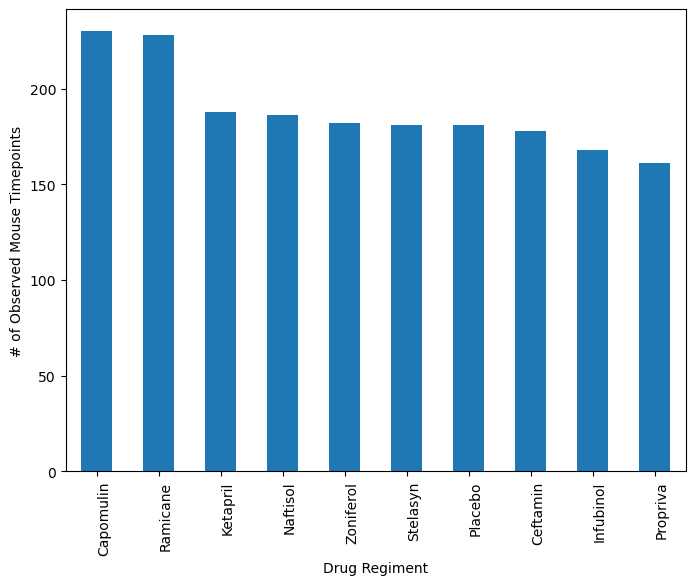

In [222]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoints = cleaned_study["Drug Regimen"].value_counts()

figure_bar = drug_timepoints.plot(kind='bar', figsize=(8,6), 
                               xlabel = "Drug Regiment",
                               ylabel = "# of Observed Mouse Timepoints")

xticklabels = drug_timepoints.index
figure_bar.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right')

plt.show()

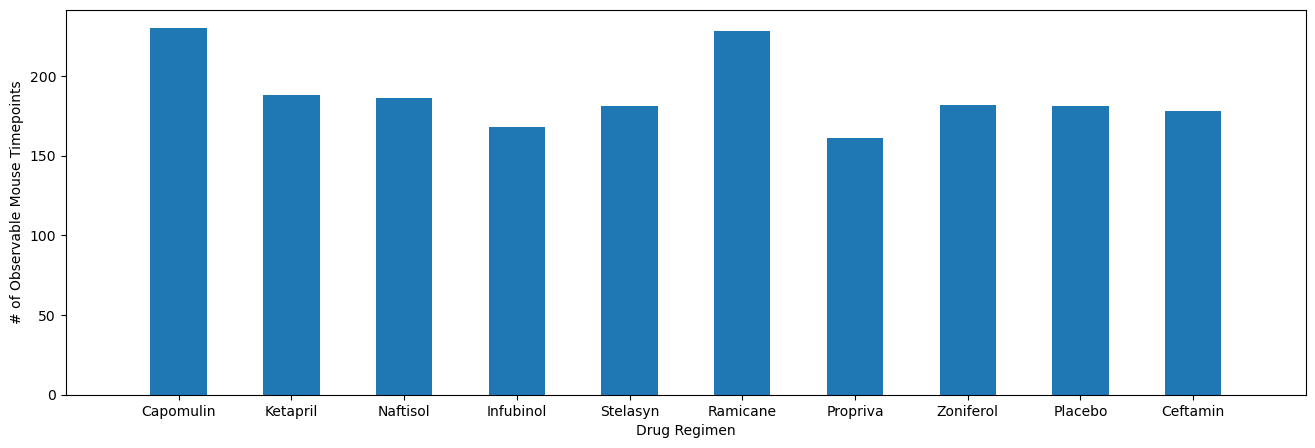

In [223]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Issues!
drug_names = cleaned_study["Drug Regimen"]
drugs = len(cleaned_study["Drug Regimen"].value_counts())
bins = np.arange(drugs+1) - 0.25
plt.figure(figsize=(16,5))
plt.hist(drug_names, bins, width=.5, align="mid")
plt.xticks(range(drugs))
plt.xlim([-1, drugs])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observable Mouse Timepoints')
plt.show()


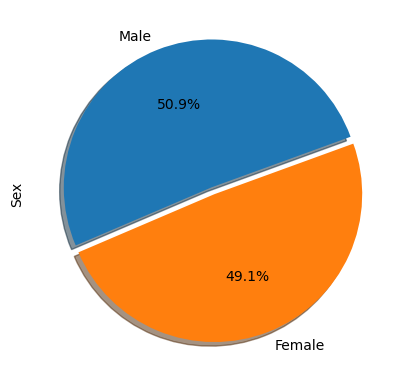

In [224]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleaned_study["Sex"].value_counts()

figure_pie = mouse_gender.plot(kind='pie', y="Sex", autopct="%1.1f%%", explode=(0.05,0), shadow=True, startangle=20)
figure_pie.set_ylabel("Sex")
plt.show()
                               

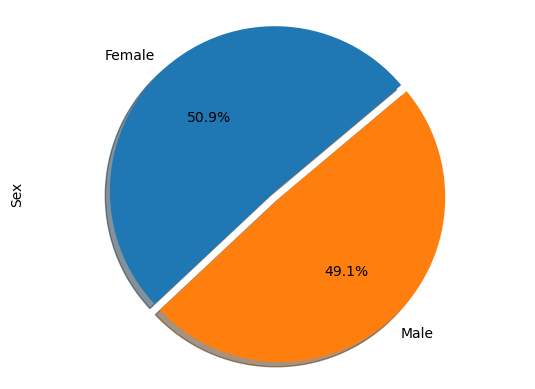

In [225]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleaned_study["Sex"].unique()
gender_counts = cleaned_study["Sex"].value_counts()
plt.pie(gender_counts, explode=(0.05, 0), labels=gender, autopct="%1.1f%%", shadow=True, startangle=40)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [141]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#treatments = pd.DataFrame
treatments = cleaned_study.loc["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], ["Timepoint"] == ["Timepoint"].max()
# Start by getting the last (greatest) timepoint for each mouse
treatments.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


IndexingError: Too many indexers

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


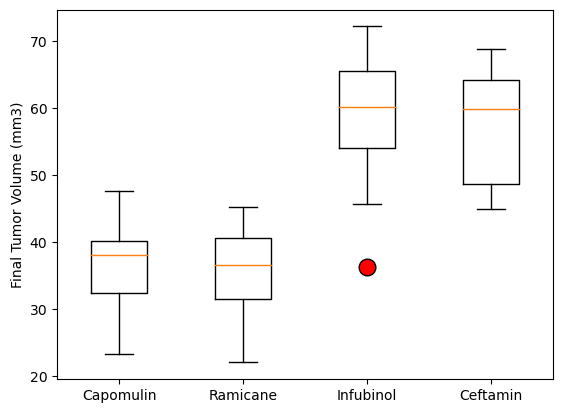

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

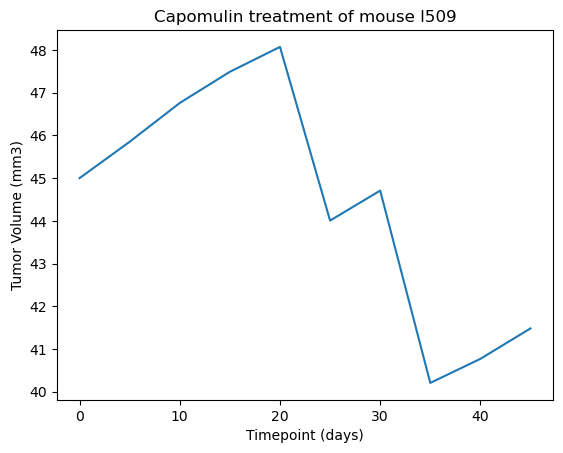

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


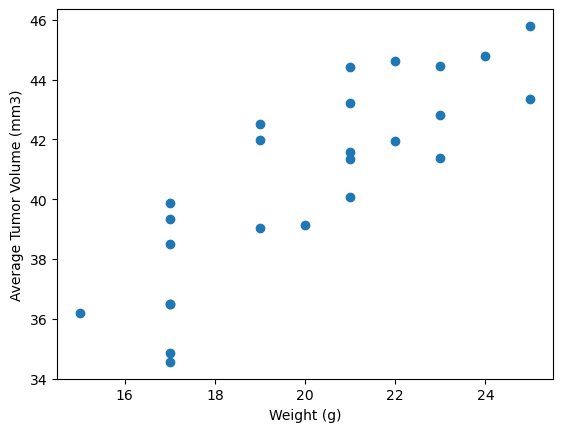

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


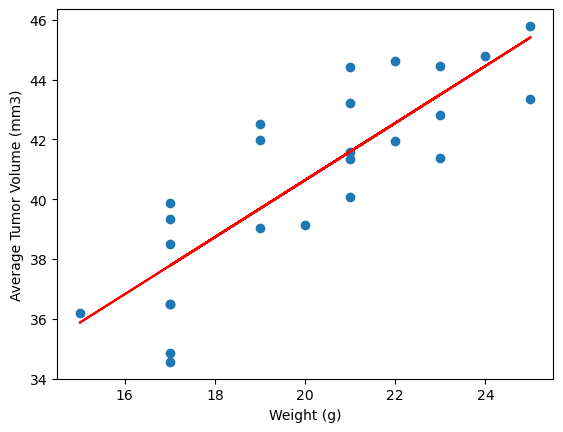

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
